# JK307 Visual Impact on Phoneme Perception in Noise with Natural Sentences

We are going to look at the pilot data and try to attack a few key questions with this notebook.

1. How much does lip reading improve phonemic perception of clear vs noisy speech?

2. Does this interaction change over the course of a sentence?

3. Do some phonemes benefit from speechreading more than others?

### Loading...

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.DataFrame.from_csv('C:/Experiments/JK307/dataOut/bigP_r1.csv')

#Relabel babble condition for clarity
df.loc[df['VideoCond'] == 'AV',('VideoCond')] = 'Audiovisual'
df.loc[df['VideoCond'] == 'AO',('VideoCond')] = 'Auditory Only'

#Make WordIdx start from 1, not zero
df.WordIdx = df.WordIdx+1

Lessons learned from Jk301 Initial Notes

In [82]:
# Fix phoneme alignment issue (correct word given but phonemes assigned to wrong word)
# Find where words match
matchIdx = df['SourceWord'] == df['TargetWord']
#Set the source phonemes to match the target
df.loc[matchIdx,('SourcePhoneme')] = df.loc[matchIdx,('TargetPhoneme')] 
#Reset the measure of phoneme accuracy
df.loc[:,'PhonemeHitBool'] = df['SourcePhoneme'] == df['TargetPhoneme']
#Set a measure all phonemes matching
df.loc[:,('AllPhonsMatch')] = df.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==1)
#Set a measure all phonemes missing
df.loc[:,('AllPhonsMiss')] = df.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==0)
# Make a column for the number of words in the sentence
df['NumWordsInSentence'] = df.groupby(['SentenceCount'])['WordIdx'].transform(max)
#Position of the word in relation to the last word of the sentence
df['WordFromLast'] = df['NumWordsInSentence']-df['WordIdx']

dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')
df = df[df['TargetPhoneme'].isin(dfPT['CMU Phonemes'])]
#df = df[df['Subject'].isin([1])]
#df.rename(columns={'0':'pennpos'}, inplace=True)
#df.rename(columns={'0.1':'upos'}, inplace=True)
df.keys()

Index([u'level_0', u'Unnamed: 0.1', u'index', u'TotalTrialOrder', u'Talker',
       u'SentenceType', u'SentenceID', u'Gender', u'NumWords', u'AVOrder',
       u'SoundCond', u'VideoCond', u'CounterBalBlock', u'TrialOrder',
       u'BabbleFile', u'Subject', u'SubjectTalkerNum', u'WordIdxList',
       u'SourceSentence', u'TargetSentence', u'FullSentence', u'dBSNR',
       u'1LogGram', u'2LogGram', u'3LogGram', u'Indx', u'Word_x', u'UnTrn',
       u'StTrn', u'NSyll', u'NPhon', u'unsDENS', u'unsFDEN', u'unsLDEN',
       u'unsCDEN', u'strDENS', u'strFDEN', u'strLDEN', u'strCDEN', u'unsBPAV',
       u'unsFBPAV', u'unsLBPAV', u'unsCBPAV', u'strBPAV', u'strFBPAV',
       u'strLBPAV', u'strCBPAV', u'unsTPAV', u'unsFTPAV', u'unsLTPAV',
       u'unsCTPAV', u'strTPAV', u'strFTPAV', u'strLTPAV', u'strCTPAV',
       u'unsPOSPAV', u'unsFPOSPAV', u'unsLPOSPAV', u'unsCPOSPAV', u'strPOSPAV',
       u'strFPOSPAV', u'strLPOSPAV', u'strCPOSPAV', u'unsLCPOSPAV',
       u'unsFLCPOSPAV', u'unsLLCPOSPAV', u'uns

In [83]:
#Make plots prettier
#Edited from Randel Olson and many at StackOverflow
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 


plt.rc('text', color = 'black') 
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('axes', titlesize = 18, labelsize = 14,labelcolor ='black')  
plt.rc('lines', linewidth=2,markersize = 10)
plt.rc('xtick',labelsize = 10,color ='black')
plt.rc('ytick',labelsize = 10,color ='black')
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
%matplotlib inline

In [84]:
df.keys()

Index([u'level_0', u'Unnamed: 0.1', u'index', u'TotalTrialOrder', u'Talker',
       u'SentenceType', u'SentenceID', u'Gender', u'NumWords', u'AVOrder',
       u'SoundCond', u'VideoCond', u'CounterBalBlock', u'TrialOrder',
       u'BabbleFile', u'Subject', u'SubjectTalkerNum', u'WordIdxList',
       u'SourceSentence', u'TargetSentence', u'FullSentence', u'dBSNR',
       u'1LogGram', u'2LogGram', u'3LogGram', u'Indx', u'Word_x', u'UnTrn',
       u'StTrn', u'NSyll', u'NPhon', u'unsDENS', u'unsFDEN', u'unsLDEN',
       u'unsCDEN', u'strDENS', u'strFDEN', u'strLDEN', u'strCDEN', u'unsBPAV',
       u'unsFBPAV', u'unsLBPAV', u'unsCBPAV', u'strBPAV', u'strFBPAV',
       u'strLBPAV', u'strCBPAV', u'unsTPAV', u'unsFTPAV', u'unsLTPAV',
       u'unsCTPAV', u'strTPAV', u'strFTPAV', u'strLTPAV', u'strCTPAV',
       u'unsPOSPAV', u'unsFPOSPAV', u'unsLPOSPAV', u'unsCPOSPAV', u'strPOSPAV',
       u'strFPOSPAV', u'strLPOSPAV', u'strCPOSPAV', u'unsLCPOSPAV',
       u'unsFLCPOSPAV', u'unsLLCPOSPAV', u'uns

### How much does lip reading improve phonemic perception of clear vs noisy speech?

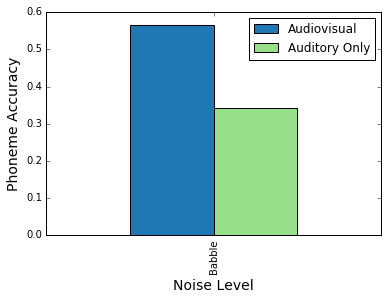

In [85]:
videoByBabble = df[['VideoCond','SoundCond','PhonemeHitBool']].groupby(['SoundCond','VideoCond']).mean().unstack()
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])

Do we replicate Sumby and Pollack (1954)?  That is to say, do we find that the ratio of AV improvement over AO is roughly constant?  Calculated as (AOerrors-AVerrors)/AOerrors

In [86]:
videoByBabbleInvert = 1-videoByBabble.loc[:,:]
av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert


PhonemeHitBool                         
VideoCond    Audiovisual Auditory Only SumbyRatio
SoundCond                                        
Babble          0.435942      0.656478   0.335938

Looks like in our case the amount phonemic improvement under noisy conditions is not only numerically higher, it's a much higher ratio of improvement. However, it could be that our listening "ceiling" is less than 100% in practice, due to loss in working memory, spelling errors or accent confusion. 

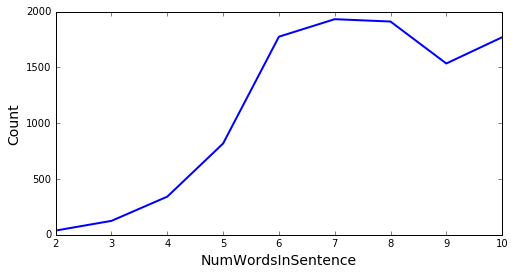

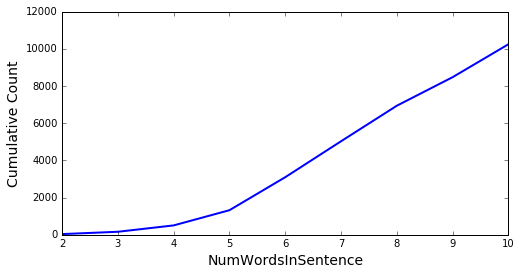

In [87]:
data = df[['NumWordsInSentence','SentenceCount']].groupby('NumWordsInSentence').count()
ax = data.plot(kind = 'line',figsize= (8,4),legend = None)
ax.set_ylabel('Count')

data = df[['NumWordsInSentence','SentenceCount']].groupby('NumWordsInSentence').count().cumsum()
ax = data.plot(kind = 'line',figsize= (8,4),legend = None)
ax.set_ylabel('Cumulative Count')

PhonemeHitBool                         
VideoCond    Audiovisual Auditory Only SumbyRatio
SoundCond                                        
Babble          0.454001      0.694409   0.346206

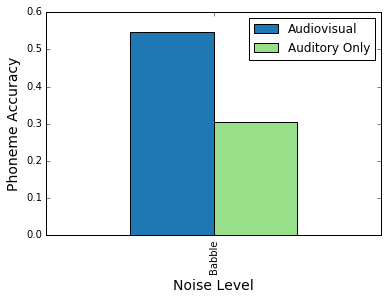

In [88]:
#Long sentence analysis
videoByBabble = df[['VideoCond','SoundCond','PhonemeHitBool']].loc[df['NumWordsInSentence'] >= 8,:].groupby(['SoundCond','VideoCond']).mean().unstack()
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]
av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert

### Does the contribution of visual information to phonemic perception change over the course of a sentence?

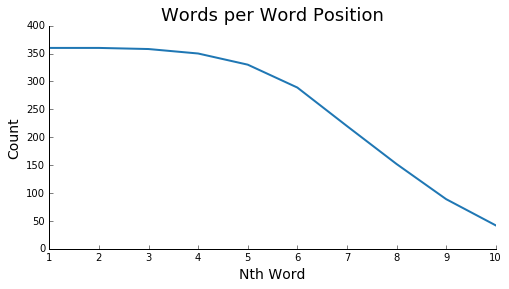

In [89]:
#Instances by word position in sentence
data = df[['PhonemeHitBool','WordIdx','WordCount']].groupby('WordCount').mean().groupby('WordIdx').count()
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Words per Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Count')
hide_spines()


At higher word positions, we have fewer instances to draw from. We'll limit or view to word positions 8 or fewer to have enough instances per condition to draw conclusions.

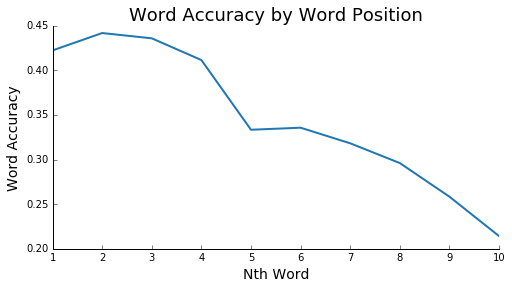

In [90]:
#Instances by word position in sentence
data = df[['WordACC','WordIdx','WordCount']].groupby('WordCount').mean().groupby('WordIdx').mean()
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Word Accuracy by Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Word Accuracy')
hide_spines()

We have a lovely linearish negative relationship between phoneme accuracy and word position. Wow! >20% drop between the first and 8th word. Same result for phoneme accuracy?

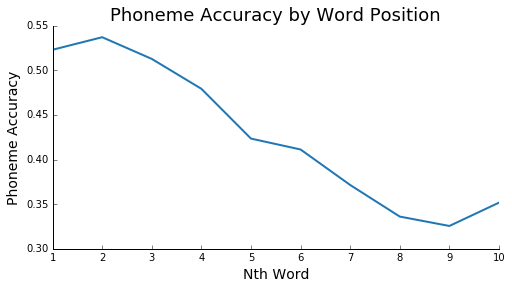

In [91]:
#Instances by word position in sentence
data = df[['PhonemeHitBool','WordIdx']].groupby('WordIdx').mean()
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Phoneme Accuracy by Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Phoneme Accuracy')
hide_spines()

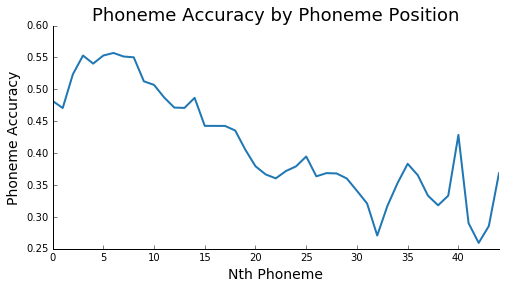

In [92]:
#Instances by phoneme position in sentence
data = df[['PhonemeHitBool','PhonemeIndex']].groupby('PhonemeIndex').mean()[0:45]
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Phoneme Accuracy by Phoneme Position')
ax.set_xlabel('Nth Phoneme')
ax.set_ylabel('Phoneme Accuracy')
hide_spines()

Yup! Phoneme accuracy will be a bit higher overall to account for partially correct responses. Trend is the same though. Lets make this more interesting by splitting it up by condition.

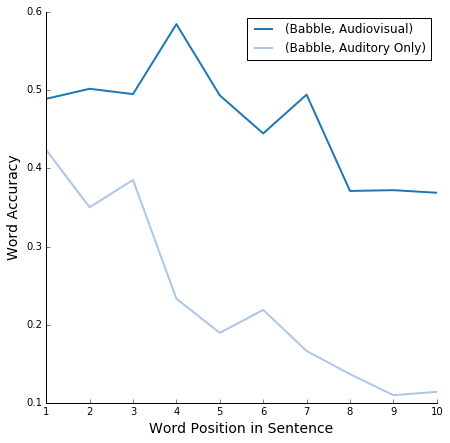

In [93]:
#data = df[['WordACC','WordIdx','WordCount','VideoCond','SoundCond','Subject']].groupby(['VideoCond','SoundCond','WordCount']).mean()
#data = data.loc[data['Subject'] <13,:]
#data = data.reset_index().groupby(['WordIdx','VideoCond','SoundCond']).mean().unstack().unstack()['WordACC']
data = df.groupby(['WordIdx','VideoCond','SoundCond']).mean().unstack().unstack()['WordACC']
ax = data.plot(kind ='line',figsize=(7,7),color = [tableau20[x] for x in [0,1,2,3]])
ax.legend(loc='best')
ax.set_ylabel('Word Accuracy')
ax.set_xlabel('Word Position in Sentence')
hide_spines()

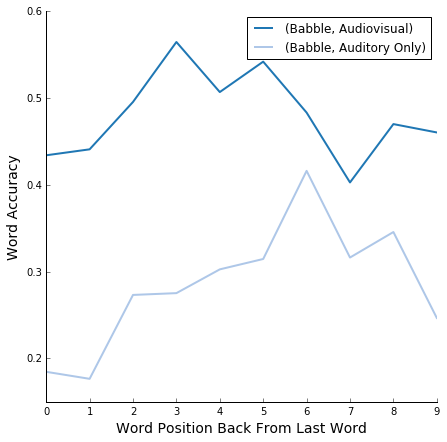

In [94]:
#data = df[['WordACC','WordIdx','WordCount','VideoCond','SoundCond','Subject']].groupby(['VideoCond','SoundCond','WordCount']).mean()
#data = data.loc[data['Subject'] <13,:]
#data = data.reset_index().groupby(['WordIdx','VideoCond','SoundCond']).mean().unstack().unstack()['WordACC']
data = df.groupby(['WordFromLast','VideoCond','SoundCond']).mean().unstack().unstack()['WordACC']
ax = data.plot(kind ='line',figsize=(7,7),color = [tableau20[x] for x in [0,1,2,3]])
ax.legend(loc='best')
ax.set_ylabel('Word Accuracy')
ax.set_xlabel('Word Position Back From Last Word')
hide_spines()

In [95]:
#First Three Last Three Not
first3 = df[df['WordIdx'] <= 3]
last3 = df[df['WordFromLast'] <= 2]
dataFirst = first3.groupby(['SoundCond','VideoCond']).mean()['WordACC'].reset_index()
dataFirst['WordPos'] = 'First3'
dataLast = last3.groupby(['SoundCond','VideoCond']).mean()['WordACC'].reset_index()
dataLast['WordPos'] = 'Last3'
dataFirst

,SoundCond,VideoCond,WordACC,WordPos
0,Babble,Audiovisual,0.495927,First3
1,Babble,Auditory Only,0.384427,First3


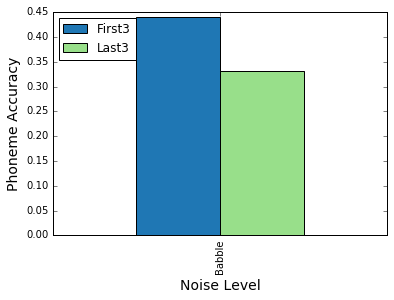

In [131]:
merged = pd.concat([dataFirst,dataLast])
merged = merged.reset_index()
merged
merged = merged.groupby(['SoundCond','WordPos']).mean().unstack()['WordACC']
merged
ax = merged.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='upper left',labels = ['First3','Last3'])
plt.figure()

In [114]:
data = df[['WordACC','WordIdx','VideoCond','SoundCond','Subject']].groupby(['VideoCond','SoundCond']).mean()
data

,,WordACC,WordIdx,Subject
VideoCond,SoundCond,,,
Audiovisual,Babble,0.484444,4.460870,12.546667
Auditory Only,Babble,0.268389,4.390653,12.511339


In [130]:
data = df[['WordACC','WordIdx','VideoCond']].groupby(['VideoCond','WordIdx']).mean()
data
av =1-data.xs('Audiovisual')
ao = 1-data.xs('Auditory Only')
sumbyRatio = (ao-av)/ao
sumbyRatio


,WordACC
WordIdx,
1,0.113676
2,0.233453
3,0.178814
4,0.458413
5,0.375068
6,0.289165
7,0.393603
8,0.271600
9,0.294797


In [120]:
av = 1-data.xs('Audiovisual',level = 1,axis=1)
ao = 1-data.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = (ao-av)/ao
ax = sumbyRatio.plot(kind ='line',figsize=(7,7),color = [tableau20[x] for x in [0,1]])
ax.legend(loc='best')
ax.set_ylabel('SumbyRatio')
ax.set_xlabel('Word Position in Sentence')
hide_spines()


AttributeError: 'Index' object has no attribute 'get_loc_level'

### Do some phonemes benefit from speechreading more than others?

,PhonemeHitBool
TargetPhoneme,
ZH,0.5625
OY,1.6250
CH,2.6875
TH,3.0625
JH,3.4375
UH,3.9375
AW,4.0625
Y,6.1875
NG,6.3125


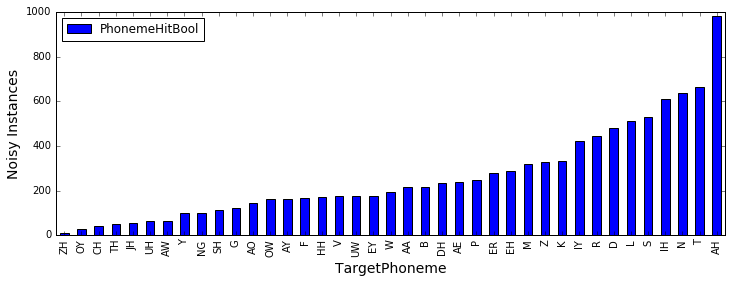

In [99]:
data = df.loc[df['SoundCond'] =='Babble',:]
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]
data = data[['TargetPhoneme','PhonemeHitBool']].groupby(['TargetPhoneme']).count()
instances = data
data = data.sort_values('PhonemeHitBool')
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='best')
ax.set_ylabel('Noisy Instances')
data/float(90)/float(24)*135


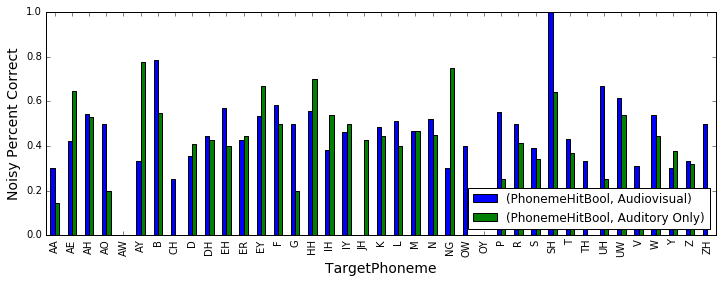

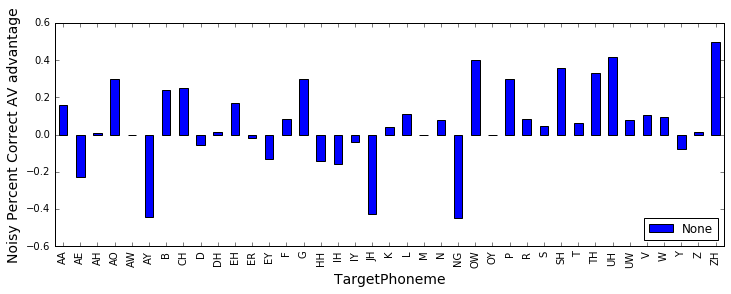

In [100]:
data = df.loc[df['SoundCond'] =='Babble',:]

#Only look at partially correct words
a= data['AllPhonsMatch'] == False 
b = data['AllPhonsMiss'] == False
boolIdx =a&b 
data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='lower right')
ax.set_ylabel('Noisy Percent Correct')
avNoisyPHit = data['PhonemeHitBool','Audiovisual']
aoNoisyPHit = data['PhonemeHitBool','Auditory Only']
plt.figure()
dif = avNoisyPHit-aoNoisyPHit
ax = dif.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='lower right')
ax.set_ylabel('Noisy Percent Correct AV advantage')

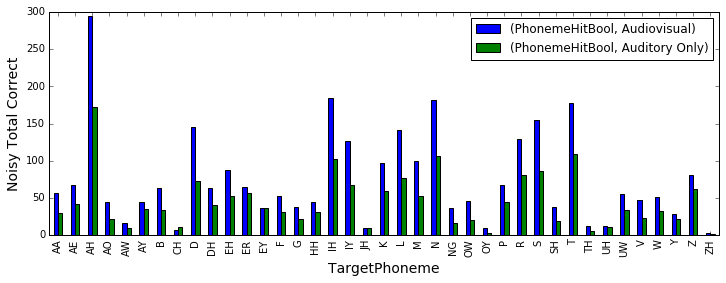

In [101]:
data = df.loc[df['SoundCond'] =='Babble',:]

#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).sum()
data = data.unstack()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='best')
ax.set_ylabel('Noisy Total Correct')
avNoisyPHitSum = data['PhonemeHitBool','Audiovisual']
aoNoisyPHitSum = data['PhonemeHitBool','Auditory Only']


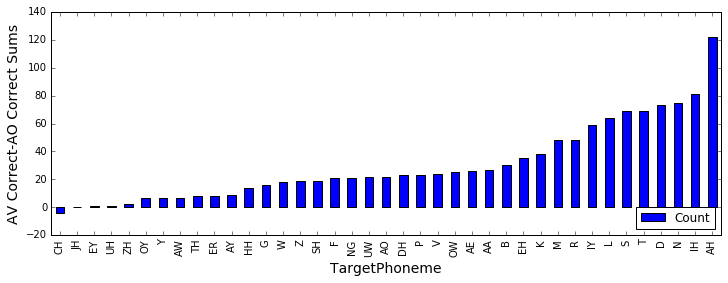

In [102]:
avGain = avNoisyPHitSum-aoNoisyPHitSum
avGainRank = avGain.rank(ascending = False)
avGain.name = 'Count'
data = avGain.sort_values()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='lower right')
ax.set_ylabel('AV Correct-AO Correct Sums')

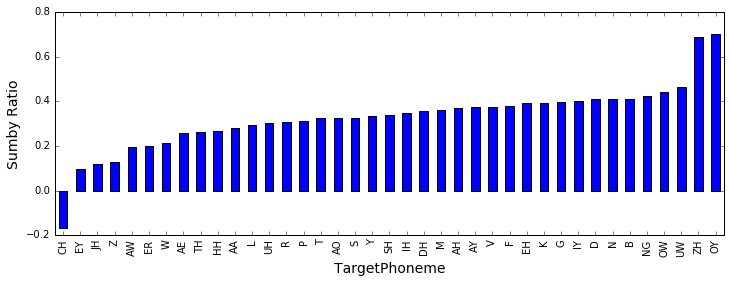

In [103]:
data = df.loc[df['SoundCond'] =='Babble',:]

#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
av = 1-data.xs('Audiovisual',level = 1,axis=1)
ao = 1-data.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = (ao-av)/ao
data = data.join(sumbyRatio)
#instances.name = 'Count'
#data = data.join(instances)
data.columns = ['AV','AO','SumbyRatio']
data = data.sort_values('SumbyRatio')
ax =data['SumbyRatio'].plot(kind ='bar',figsize=(12,4),legend = None)
ax.set_ylabel('Sumby Ratio')

Yay! AV weights for all noisy phonemes!

In [104]:
import os
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')
sumbyRank = sumbyRatio.rank()
aoNoisyRank = aoNoisyPHit.rank()
avNoisyRank = avNoisyPHit.rank()
rankDif = avNoisyRank-aoNoisyRank
rankDifNorm = (rankDif-min(rankDif))/max(rankDif-min(rankDif))
rankDifNorm

TargetPhoneme
AA    0.539130
AE    0.226087
AH    0.573913
AO    0.826087
AW    0.530435
AY    0.052174
B     0.643478
CH    0.565217
D     0.434783
DH    0.513043
EH    0.843478
ER    0.434783
EY    0.434783
F     0.669565
G     0.826087
HH    0.486957
IH    0.226087
IY    0.408696
JH    0.217391
K     0.521739
L     0.721739
M     0.452174
N     0.591304
NG    0.000000
OW    0.756522
OY    0.530435
P     0.913043
R     0.634783
S     0.556522
SH    0.643478
T     0.608696
TH    0.669565
UH    1.000000
UW    0.643478
V     0.539130
W     0.660870
Y     0.382609
Z     0.504348
ZH    0.921739
dtype: float64

Let's visualize the advantage of having visual information at the phonetic level a better way, with the help of an interactive phonetic chart! Lots of code below so be patient!

In [105]:

global cmaps
def BokehTable(cmaps):
    from bokeh.models import HoverTool, ColumnDataSource,CustomJS
    from bokeh.plotting import figure, show, output_file
    import pandas as pd
    import os
    import math
    from bokeh.io import output_notebook,vform,push_notebook
    global source
    

    cmap = cmaps[0]        
    output_notebook()
    #dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.csv'))
    dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')
    #cmap = [aoNoisyRank.loc[aoNoisyRank.index == cmu].values[0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(aoNoisyRank.values)
    #cmap = [rankDifNorm.loc[rankDifNorm.index == cmu].values[0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(rankDifNorm.values)
        
    source = ColumnDataSource(
        data=dict(
            xaxis=[str(x) for x in dfPT['AdrianXCoord']],
            yaxis=[str(y) for y in dfPT['AdrianYCoord']],
            cmu=[str(s) for s in dfPT['CMU Phonemes']],
            type=[str(x) for x in cmap],
            sym=[x for x in dfPT['IPA symbol']],
            jrank=[x for x in dfPT['Jeffers Visibility Rank']],
            mpcrank=[x for x in dfPT['MPC Rank']], 
            gvrank=[x for x in dfPT['Gillen Based Visual Weight'].rank(ascending=False)],
            gaorank=[x for x in dfPT['Gillen Audio Only Clear Hit Rate'].rank(ascending=False)],
            example=[x for x in dfPT['CMU Examples']],   
            type_color = ['#%02x%02x%02x' % (0,0,0) if math.isnan(x) else '#%02x%02x%02x' % (x*255,255-(x*255),0) for x in cmap] #Must be hexadecima
        )
    )

    p = figure(tools="resize,hover,save")
    p.plot_width = 1200
    p.toolbar_location = None
    p.outline_line_color = None

    p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
           fill_alpha=0.6, color="type_color")

    #p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
    #       fill_alpha=0.6)

    text_props = {
        "source": source,
        "angle": 0,
        "color": "black",
        "text_align": "left",
        "text_baseline": "middle"
    }

    p.text(x="xaxis", y="yaxis", text="sym",
           text_font_style="bold", text_font_size="15pt", **text_props)



    p.grid.grid_line_color = None

    p.select_one(HoverTool).tooltips = [
        ("cmu", "@cmu"),
        ("example", "@example"),
        ("jrank","@jrank"),
        ("mpcrank","@mpcrank"),
        ("gaorank","@gaorank"),
        ("gvrank","@gvrank"),

    ]
    show(p) 
    
def update(f):
    import math
    from bokeh.io import push_notebook
    cmap = cmaps[titles.index(f)] 
    type_color = ['#%02x%02x%02x' % (0,0,0) if math.isnan(x) else '#%02x%02x%02x' % (x*255,255-(x*255),0) for x in cmap]
    source.data['type_color'] = type_color
    push_notebook() 

In [106]:
data = df.loc[df['SoundCond'] =='Babble',:]
#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
ao = data.xs('Auditory Only',level = 1,axis=1)
av = data.xs('Audiovisual',level = 1,axis=1)

#Lousy Hack!!!!!!!!!!
ao.loc[('ZH'),('PhonemeHitBool')] = 0
av.loc[('ZH'),('PhonemeHitBool')] = 0

aoRank = ao.rank(ascending = False)
avRank = av.rank(ascending = False)



sumbyRatio = ((1-ao)-(1-av))/(1-ao)
sumbyRank = sumbyRatio.rank(ascending = False)
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')

cmaps =[]
titles =[]

Jeffers = dfPT['Jeffers Visibility Rank']
titles.append('Jeffers Visibility Map')
cmaps.append(Jeffers/max(Jeffers))

MPC = dfPT['MPC Rank']
titles.append('Movement-to-Phonetic Correspondance Map')
cmaps.append(MPC/max(MPC))

titles.append('Sumby Noisy Visibility Map')
cmaps.append([sumbyRank.loc[sumbyRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(sumbyRank.values))

titles.append('Auditory Only Noisy Rank Map')
cmaps.append([aoRank.loc[aoRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(aoRank.values)) 

titles.append('Audiovisual Noisy Rank Map')
cmaps.append([avRank.loc[avRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(avRank.values)) 

titles.append('AV Gain Raw Rank')
cmaps.append([avGainRank[avGainRank.index == cmu].values for cmu in dfPT['CMU Phonemes'][0:39]]/max(avGainRank.values)) 

#pd.concat([Jeffers,dfPT['CMU Phonemes'][0:39]],axis=1).set_index('CMU Phonemes')

C:\Anaconda2_32bit\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2_32bit\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [107]:
sumbyRank

,PhonemeHitBool
TargetPhoneme,
AA,28
AE,31
AH,15
AO,22
AW,34
AY,14
B,5
CH,39
D,7


Here it is! Use the drop down menu below to select the coloring scheme for the phonetic chart.

In [108]:
from IPython.html.widgets import interact
interact(update,f=titles)

<function __main__.update>

In [109]:
BokehTable(cmaps)    

Loading BokehJS ...

In [110]:
#For future reference
#callback = CustomJS(args=dict(source=source), code="""
#        var data = source.get('data');
#        var f = cb_obj.get('value')
#        x = data['x']
#        y = data['y']
#        for (i = 0; i < x.length; i++) {
#            y[i] = Math.pow(x[i], f)
#        }
#        source.trigger('change');
#    """)


We can also look at the map for the clear data

In [111]:
data = df.loc[df['SoundCond'] =='Clear',:]


data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
av = 1-data.xs('Audiovisual',level = 1,axis=1)
ao = 1-data.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = (ao-av)/ao
sumbyRank = sumbyRatio.rank(ascending = False)
cmaps = []
titles = []
cmaps.append([sumbyRank.loc[sumbyRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(sumbyRank.values))
titles.append('Sumby Clear Visibility Map')
BokehTable(cmaps)

KeyError: 'Audiovisual'

### Did participants have similar performance?

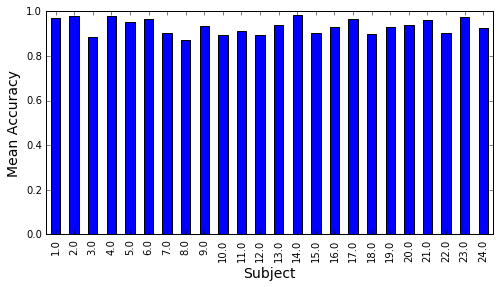

In [34]:
#Average acc
ax = df[['PhonemeHitBool','Talker','Subject']][df['SoundCond'] == 'Clear'].groupby('Subject').mean().plot(kind = 'bar',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

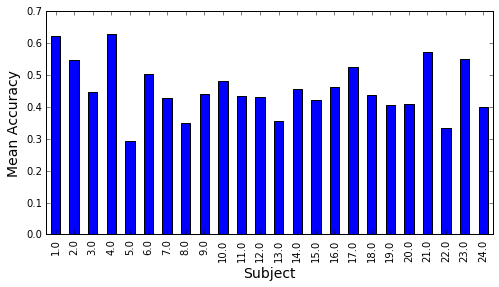

In [35]:
#Average acc
ax = df[['PhonemeHitBool','Talker','Subject']][df['SoundCond'] == 'Babble'].groupby('Subject').mean().plot(kind = 'bar',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

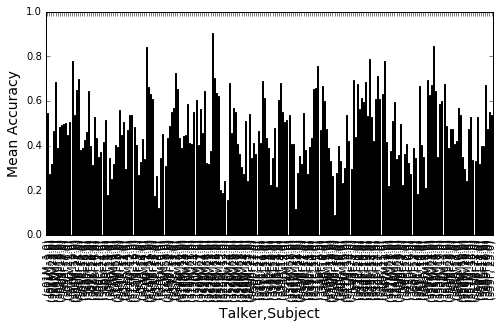

In [36]:
#Average acc
ax = df[['PhonemeHitBool','Talker','Subject']][df['SoundCond'] == 'Babble'].groupby(['Talker','Subject']).mean().plot(kind = 'bar',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

### Did participants improve over the course of of each block as they got used to the speaker?

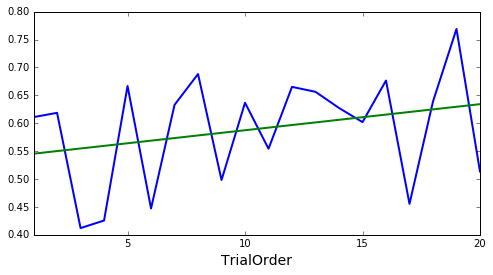

In [30]:
data = df[['PhonemeHitBool','TrialOrder']][df['SoundCond'] == 'Babble'].groupby('TrialOrder').mean()
data.plot(kind = 'line',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

#From Dan Allen
import statsmodels.api as sm
def fit_line2(x, y):
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0] # could also return stderr in each via fit.bse
x = data.index
y = data.values
m, b = fit_line2(x,y)
N = 100 # could be just 2 if you are only drawing a straight line...
points = np.linspace(x.min(), x.max(), N)
plt.plot(points, m*points + b)


### Do different parts of speech have different AV profiles?

In [31]:
df['PENNPOS'][0:9]

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
Name: PENNPOS, dtype: float64

In [32]:
#Average acc
ax = df[['PhonemeHitBool','VideoCond','UPOS']][df['SoundCond'] == 'Babble'].groupby(['UPOS','VideoCond']).mean().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Mean Accuracy')

TypeError: Empty 'DataFrame': no numeric data to plot

In [40]:
#Average acc
ax = df[['PhonemeHitBool','VideoCond','PENNPOS']][df['SoundCond'] == 'Babble'].groupby(['PENNPOS','VideoCond']).mean().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Mean Accuracy')

TypeError: Empty 'DataFrame': no numeric data to plot

In [33]:
#Counts
ax = df[['PhonemeHitBool','VideoCond','pennpos']][df['SoundCond'] == 'Babble'].groupby(['pennpos','VideoCond']).count().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Count')

KeyError: "['pennpos'] not in index"

In [ ]:
#COunts
ax = df[['WordIdx','upos']][df['SoundCond'] == 'Babble'].groupby(['upos','WordIdx']).size().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Count')
ax.legend(loc= 'best')

In [ ]:
#Long sentence analysis
videoByBabble = df[['pennpos','VideoCond','PhonemeHitBool']].loc[df['SoundCond'] == 'Babble',:].groupby(['pennpos','VideoCond']).mean().unstack()
videoByBabbleCount = df[['pennpos','VideoCond','PhonemeHitBool']].loc[df['SoundCond'] == 'Babble',:].groupby(['pennpos','VideoCond']).size().unstack()
#Restrict to words with more than 300 instances in each group
booldf =(videoByBabbleCount > 300)
videoByBabble = videoByBabble[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]

av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert

In [ ]:
data=df
videoByBabble = data[['upos','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['upos','VideoCond']).mean().unstack()
videoByBabbleCount = data[['upos','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['upos','VideoCond']).size().unstack()
#Restrict to words with more than 200 instances in each group
booldf =(videoByBabbleCount > 200)
videoByBabble = videoByBabble[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='lower left',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]

av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert

In [ ]:
#Restrict to a particular word position
data = df.loc[df['WordIdx'] == 1,:]
#data=df
videoByBabble = data[['upos','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['upos','VideoCond']).mean().unstack()
videoByBabbleCount = data[['upos','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['upos','VideoCond']).size().unstack()
#Restrict to words with more than 100 instances in each group
booldf =(videoByBabbleCount > 100)
videoByBabble = videoByBabble[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
videoByBabbleCount = videoByBabbleCount[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabbleCount.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Count')
ax.set_xlabel('Part of Speech')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])

plt.figure()

#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Part Of Speech')
ax.legend(loc='lower left',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]

av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert



In [ ]:
#Restrict to a particular word position
data = df.loc[df['upos'] == 'NOUN',:]
#data=df
videoByBabble = data[['WordIdx','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['WordIdx','VideoCond']).mean().unstack()
videoByBabbleCount = data[['WordIdx','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['WordIdx','VideoCond']).size().unstack()
#Restrict to words with more than 50 instances in each group
booldf =(videoByBabbleCount > 50)
videoByBabble = videoByBabble[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
videoByBabbleCount = videoByBabbleCount[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabbleCount.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Count')
ax.set_xlabel('WordIdx')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])

plt.figure()

#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('WordIdx')
ax.legend(loc='lower left',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]

av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
#videoByBabbleInvert

In [ ]:
#COunts
ax = df[['TargetPhoneme','upos']][df['SoundCond'] == 'Babble'].groupby(['TargetPhoneme','upos']).size().unstack().plot(kind = 'line',figsize=(30,12))
ax.set_ylabel('Count')
ax.legend(loc= 'best')

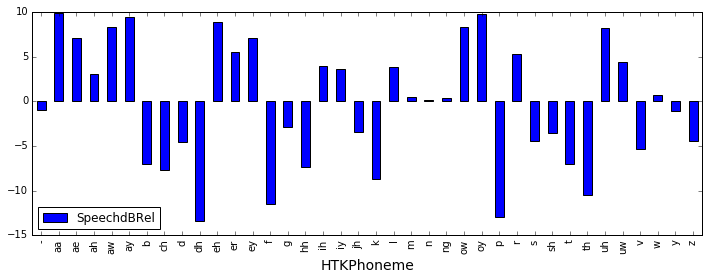

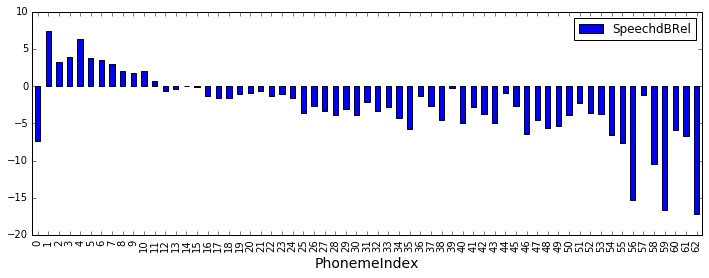

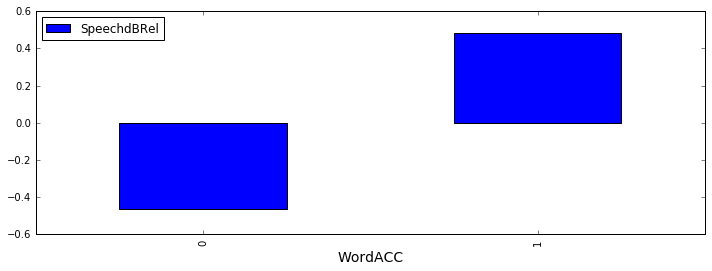

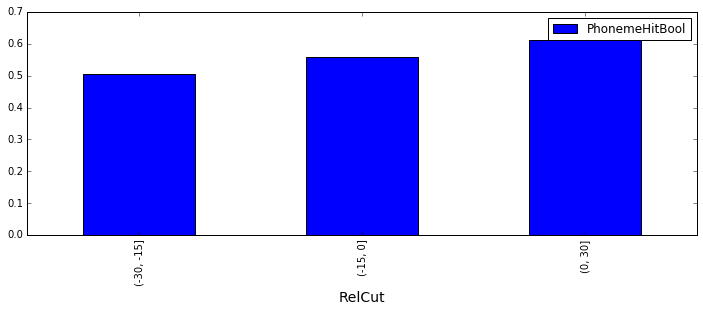

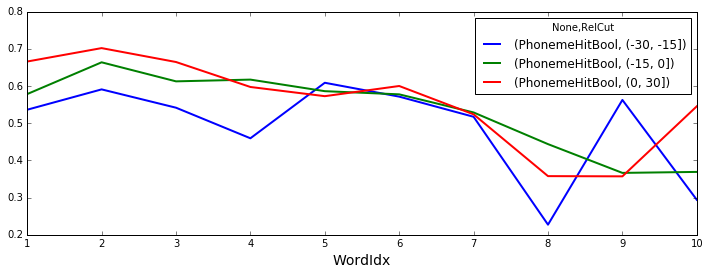

In [34]:
import math
def amp2db(scalar):
    return 20 * math.log10(scalar)

df['SpeechdB'] =  df['SpeechRMS'].apply(lambda x: amp2db(x) if x >=0 else 0)
df['SpeechdBRel'] = df[['SpeechdB','SentenceCount']].groupby('SentenceCount').apply(lambda x: x-np.mean(x))['SpeechdB']
df[['HTKPhoneme','SpeechdBRel']].groupby('HTKPhoneme').mean().plot(kind='bar',figsize=(12,4))
df[['PhonemeIndex','SpeechdBRel']].groupby('PhonemeIndex').mean().plot(kind='bar',figsize=(12,4))
df[['WordACC','SpeechdBRel']].groupby('WordACC').mean().plot(kind='bar',figsize=(12,4))
isNoisy = df['SoundCond'] == 'Babble'
dfN = df[isNoisy]
dfN['RelCut'] = pd.cut(dfN['SpeechdBRel'],[-30, -15,  0, 30])
dfN[['PhonemeHitBool','RelCut',]].groupby('RelCut').mean().plot(kind='bar',figsize=(12,4))

dfN[['PhonemeHitBool','WordIdx','RelCut']].groupby(['WordIdx','RelCut']).mean().unstack().plot(kind='line',figsize=(12,4))


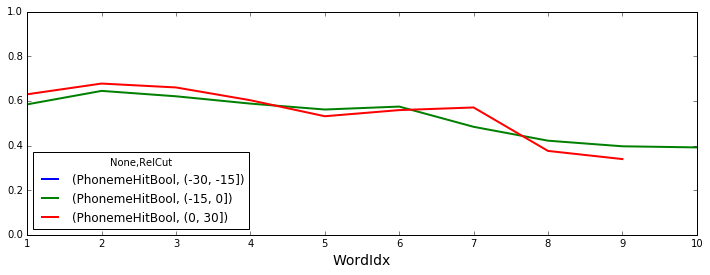

In [35]:
wordAvgN = dfN[['SpeechdBRel','PhonemeHitBool','WordIdx','WordCount']].groupby('WordCount').mean()
wordAvgN['RelCut'] = pd.cut(wordAvgN['SpeechdBRel'],[-30, -15,  0, 30])
wordAvgN[['PhonemeHitBool','WordIdx','RelCut']].groupby(['WordIdx','RelCut']).mean().unstack().plot(kind='line',figsize=(12,4))

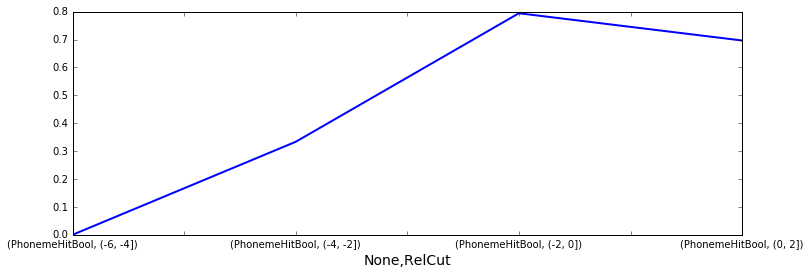

In [36]:
FirstWordAvgN = dfN[dfN['WordIdx'] <= 3]
FirstWordAvgN['SpeechdBRel']
FirstWordAvgN = FirstWordAvgN[['SpeechdBRel','PhonemeHitBool','SentenceCount']].groupby('SentenceCount').mean().round()
#FirstWordAvgN['RelCut'] = pd.cut(FirstWordAvgN['SpeechdBRel'],[-15,-10,-5,0,5])
FirstWordAvgN['RelCut'] = pd.cut(FirstWordAvgN['SpeechdBRel'],[-6,-4,-2,0,2])
FirstWordAvgN[['PhonemeHitBool','RelCut']].groupby(['RelCut']).mean().unstack().plot(kind='line',figsize=(12,4))

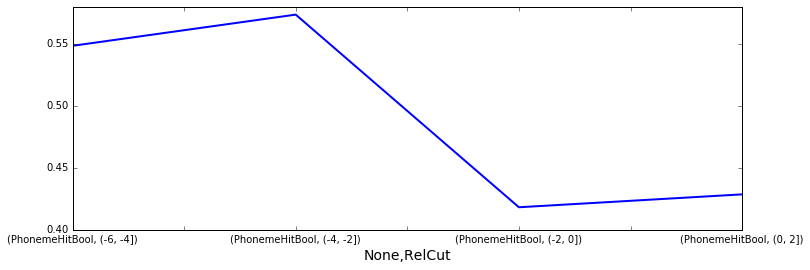

In [37]:
LastWordAvgN = dfN[dfN['WordFromLast'] <= 2]
LastWordAvgN['SpeechdBRel']
LastWordAvgN = LastWordAvgN[['SpeechdBRel','PhonemeHitBool','SentenceCount']].groupby('SentenceCount').mean().round()
LastWordAvgN
#LastWordAvgN['RelCut'] = pd.cut(LastWordAvgN['SpeechdBRel'],[-15,-10,-5,0,5])
LastWordAvgN['RelCut'] = pd.cut(LastWordAvgN['SpeechdBRel'],[-6,-4,-2,0,2])
LastWordAvgN[['PhonemeHitBool','RelCut']].groupby(['RelCut']).mean().unstack().plot(kind='line',figsize=(12,4))


C:\Anaconda2_32bit\lib\site-packages\pandas\computation\expressions.py:190: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))
C:\Anaconda2_32bit\lib\site-packages\pandas\computation\expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


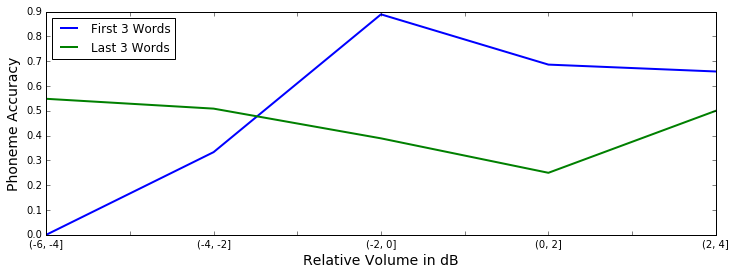

In [38]:
df['IsFirstThree'] = df['WordIdx'] <= 3 
df['IsLastThree'] = df['WordFromLast'] <= 2 
FirstOrLast = df['IsFirstThree'] + df['IsLastThree']
SixOrMore = df['NumWordsInSentence'] >=6

dfX = df[FirstOrLast*SixOrMore]
isNoisy = dfX['SoundCond'] == 'Babble'
dfNx = dfX[isNoisy]
#FirstOrLast[df['NumWordsInSentence'] >=6]


dfNx = dfNx[['SpeechdBRel','PhonemeHitBool','SentenceCount','IsLastThree']].groupby(['SentenceCount','IsLastThree']).mean().round().reset_index()
dfNx
#FirstOrLast
#FirstOrLast*SixOrMore
#LastWordAvgN['RelCut'] = pd.cut(LastWordAvgN['SpeechdBRel'],[-15,-10,-5,0,5])

dfNx['RelCut'] = pd.cut(dfNx['SpeechdBRel'],[-6,-4,-2,0,2,4])
ax = dfNx[['PhonemeHitBool','RelCut','IsLastThree']].groupby(['RelCut','IsLastThree']).mean().unstack().plot(kind='line',figsize=(12,4))
ax.legend(loc='upper left',labels = ['First 3 Words','Last 3 Words'])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Relative Volume in dB')

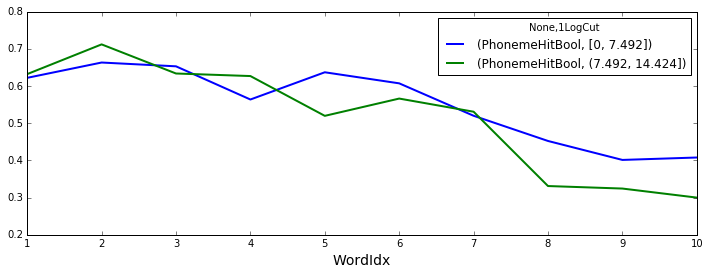

In [39]:
dfN['1LogCut'] = pd.qcut(dfN['1LogGram'],2)
dfN[['PhonemeHitBool','WordIdx','1LogCut']].groupby(['WordIdx','1LogCut']).mean().unstack().plot(kind='line',figsize=(12,4))

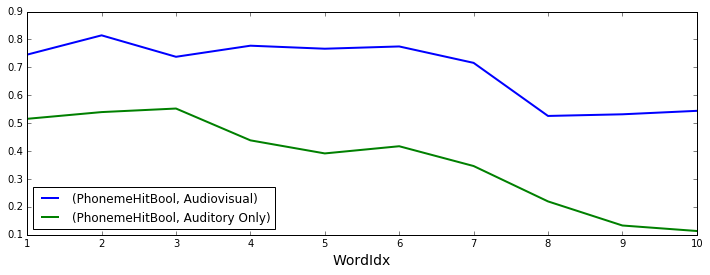

In [40]:
ax = dfN[['PhonemeHitBool','WordIdx','VideoCond']].groupby(['WordIdx','VideoCond']).mean().unstack().plot(kind='line',figsize=(12,4))
ax.legend(loc='best')

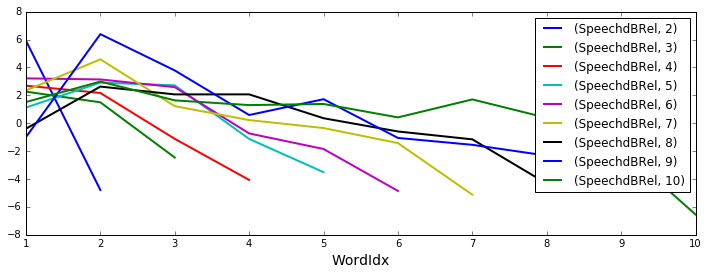

In [41]:
ax = dfN[['SpeechdBRel','WordIdx','NumWordsInSentence']].groupby(['WordIdx','NumWordsInSentence']).mean().unstack().plot(kind='line',figsize=(12,4))
ax.legend(loc='upper right')

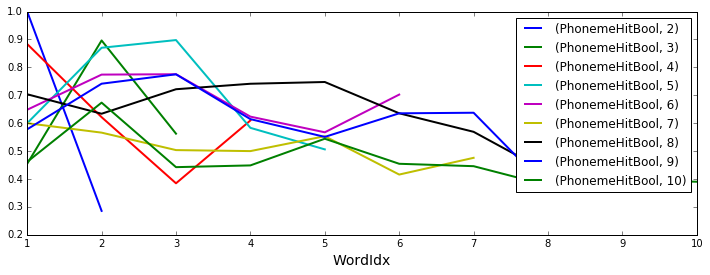

In [42]:
ax = dfN[['PhonemeHitBool','WordIdx','NumWordsInSentence']].groupby(['WordIdx','NumWordsInSentence']).mean().unstack().plot(kind='line',figsize=(12,4))
ax.legend(loc='upper right')

In [43]:
numSubs = 24
grouped= dfN[['PhonemeHitBool','WordIdx','NumWordsInSentence','Subject']].groupby(['WordIdx','NumWordsInSentence','Subject'])
subMean = grouped.mean().reset_index()
subMean
subG =subMean[['PhonemeHitBool','WordIdx','NumWordsInSentence','Subject']].groupby(['WordIdx','NumWordsInSentence'])
means = subG.mean()['PhonemeHitBool']
errors = subG.std()['PhonemeHitBool']/np.sqrt(float(numSubs-1))
means.columns = {'2','3','4','5','6','7','8','9','10'}
errors.columns = {'2','3','4','5','6','7','8','9','10'}
means
errors
#fig, ax = plt.subplots()
#means.plot(yerr=errors, kind='bar',ax=ax,figsize=(12,4))


WordIdx  NumWordsInSentence
1        2                    NaN
         3                    NaN
         4                    NaN
         5                    NaN
         6                    NaN
         7                    NaN
         8                    NaN
         9                    NaN
         10                   NaN
2        2                    NaN
         3                    NaN
         4                    NaN
         5                    NaN
         6                    NaN
         7                    NaN
         8                    NaN
         9                    NaN
         10                   NaN
3        3                    NaN
         4                    NaN
         5                    NaN
         6                    NaN
         7                    NaN
         8                    NaN
         9                    NaN
         10                   NaN
4        4                    NaN
         5                    NaN
         6          

In [44]:
df.keys()

Index([u'level_0', u'Unnamed: 0.1', u'index', u'TotalTrialOrder', u'Talker',
       u'SentenceType', u'SentenceID', u'Gender', u'NumWords', u'AVOrder',
       ...
       u'PENNPOS', u'UPOS', u'AllPhonsMatch', u'AllPhonsMiss',
       u'NumWordsInSentence', u'WordFromLast', u'SpeechdB', u'SpeechdBRel',
       u'IsFirstThree', u'IsLastThree'],
      dtype='object', length=101)

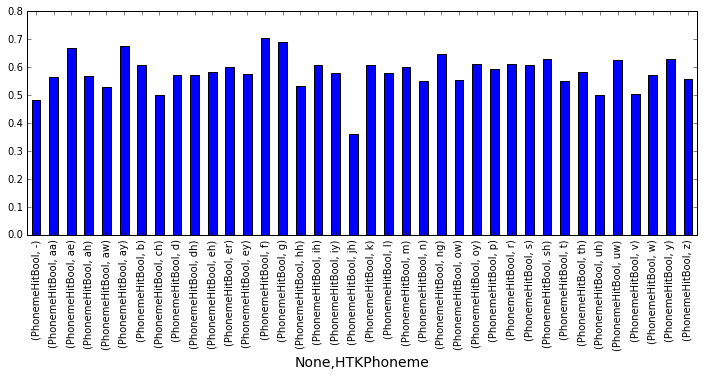

In [45]:
ax = dfN[['PhonemeHitBool','HTKPhoneme']].groupby(['HTKPhoneme']).mean().unstack().plot(kind='bar',figsize=(12,4))


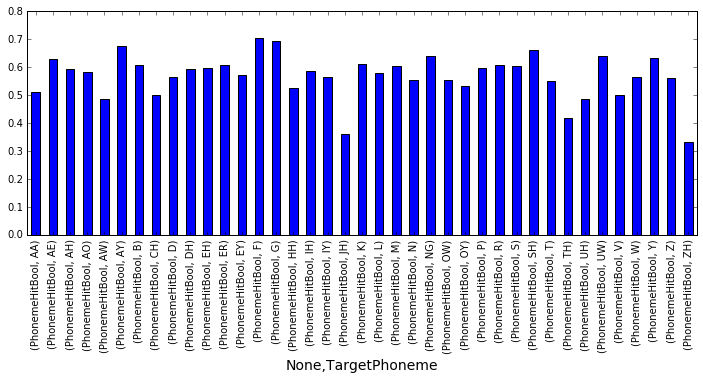

In [46]:
ax = dfN[['PhonemeHitBool','TargetPhoneme']].groupby(['TargetPhoneme']).mean().unstack().plot(kind='bar',figsize=(12,4))

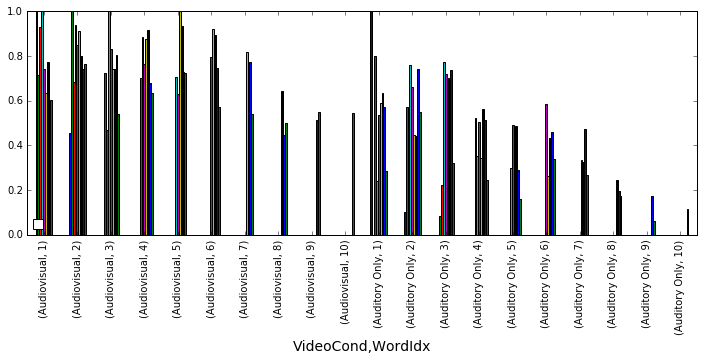

In [47]:
ax = dfN[['PhonemeHitBool','WordIdx','NumWordsInSentence','VideoCond']].groupby(['VideoCond','WordIdx','NumWordsInSentence',]).mean().unstack().plot(kind='bar',figsize=(12,4))
ax.legend(loc='lower left',labels ='')

In [48]:
dfN['SpeechdBRel']

0      -19.167677
1       10.142229
2       -5.469184
3       13.890395
4       14.581581
5       -6.704626
6        2.609231
7       -8.801237
8        7.508122
9       -5.136959
10     -23.363599
11      -4.384733
12      -6.122421
13     -21.464585
14       6.335520
15      -2.576910
16      10.982912
17       9.249205
18       8.829377
19      10.222720
20       6.240432
21      -0.265492
22       2.865698
23      -5.089664
24      14.728448
25      26.894829
26      20.258474
27     -12.146652
28       8.194642
29      -0.699322
          ...    
5169     4.277408
5170     2.257662
5171     4.340296
5172   -10.398179
5173    11.569525
5174     5.375468
5175     9.040580
5176    -0.647470
5177    -6.557986
5178    -7.263410
5179     8.240075
5180    -4.447795
5181     3.817261
5182    -6.863886
5183    -6.741791
5184   -11.577152
5185    -2.816805
5186    -3.554909
5187    -7.005209
5188     4.848313
5189    -4.600288
5190     2.646198
5191    -5.413328
5192    -7.936250
5193    -2